<a href="https://colab.research.google.com/github/jainsaransh14/Capstone-Project-1/blob/main/Saransh_EDA_World_Bank_Global_Education_Analysis_(23_09_2022)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

**Importing packages like Pandas,Numpy, Matplotlib and Seaborn**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1=('/content/drive/MyDrive/projects..../EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/projects..../EdStatsCountry.csv')
path3=('/content/drive/MyDrive/projects..../EdStatsData.csv')
path4=('/content/drive/MyDrive/projects..../EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/projects..../EdStatsSeries.csv')

In [ ]:
country_df=pd.read_csv(path2)
main_data=pd.read_csv(path3)
new_data=pd.read_csv(path3)


###***Getting overview of data***

In [ ]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
# Droppe null value  columns
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)


In [ ]:
main_data.drop(['Country Code'],axis=1,inplace=True)

In [ ]:
main_data.set_index(['Country Name'],inplace=True)

In [ ]:
Income_df=main_data.loc[['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income']]

In [ ]:
Region_df=main_data.loc[['World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

###***GDP on World map year=2015***




In [ ]:
exp1_2=pd.read_csv(path3)
exp1_2.set_index('Indicator Code',inplace=True)
exp2_2=exp1_2.loc[['NY.GDP.MKTP.CD'],['Country Name','Country Code','2015']]
exp2_2.set_index('Country Name',inplace=True)
exp3_2=exp2_2.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
exp3_2.reset_index('Country Name',inplace=True)

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = exp3_2['Country Code'],
    z = exp3_2["2015"],
    text = exp3_2['Country Name'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'GDP',
))
fig.update_layout(
    title_text='GDP of Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = '',
        showarrow = False
    )]
)

fig.show()

###***Countries above mean GDP of world and mean per capita of world***

---



---



---



mean GDP

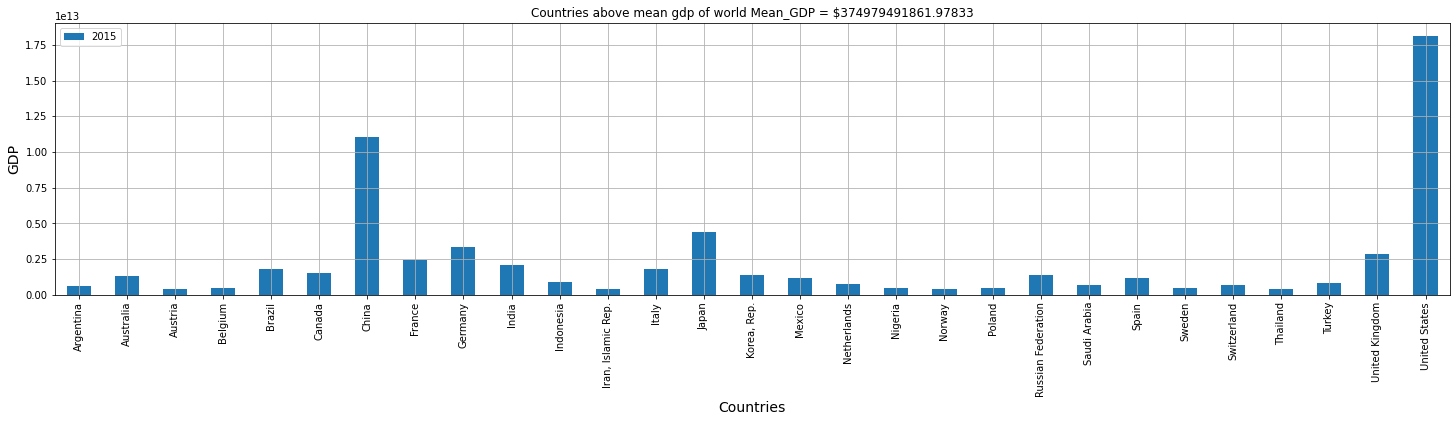

In [ ]:
graph_3a=main_data.loc[main_data['Indicator Code']=='NY.GDP.MKTP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
df = graph_3a.to_frame(name="2015")
country_above_mean_gdp=df[df['2015']>np.mean(df['2015'])]
Mean_GDP = np.mean(df['2015'])
Mean_GDP
plt.rcParams['figure.figsize']=(25,5)
country_above_mean_gdp.plot(kind='bar')
plt.grid(True)
plt.title(f'Countries above mean gdp of world Mean_GDP = ${Mean_GDP}')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('GDP',fontsize=14)
plt.show()

Mean per capita

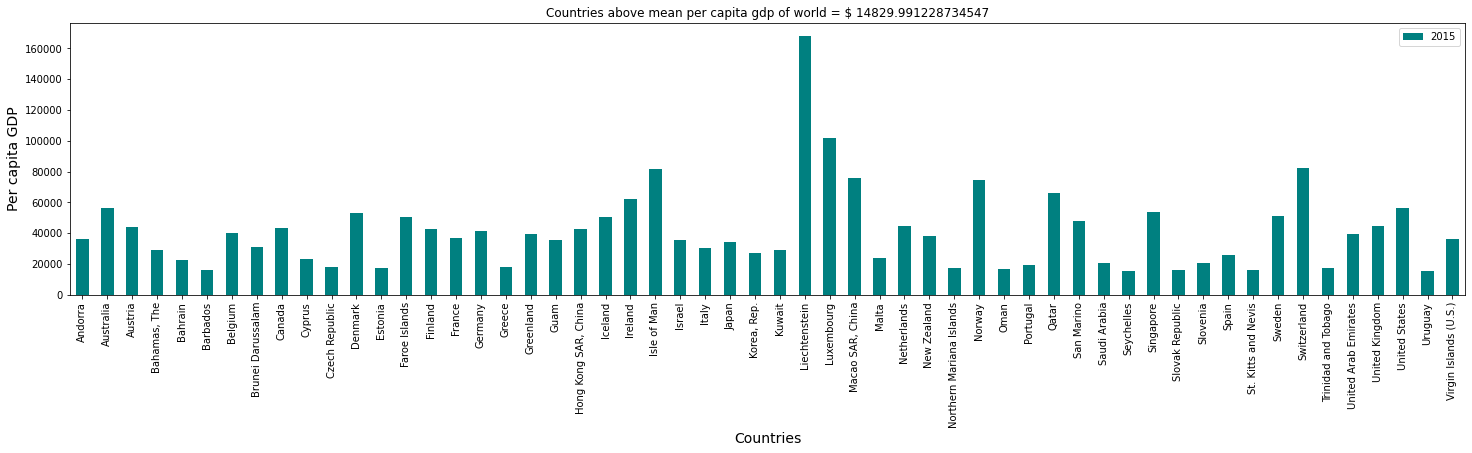

In [ ]:
graph_3b=main_data.loc[main_data['Indicator Code']=='NY.GDP.PCAP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
df_1 = graph_3b.to_frame(name="2015")
country_above_mean_pcgdp=df_1[df_1['2015']>np.mean(df_1['2015'])]
mean_percapita_gdp=np.mean(df_1['2015'])
plt.rcParams['figure.figsize']=(25,5)
country_above_mean_pcgdp.plot(kind='bar',color='Teal')
plt.title(f'Countries above mean per capita gdp of world = $ {mean_percapita_gdp}')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Per capita GDP',fontsize=14)
plt.show()

In [ ]:
Countries_incomegroup=country_df[['Income Group','Short Name']].groupby(country_df[['Income Group','Short Name']]['Income Group']).agg({'Short Name':'count'})
Countries_incomegroup.rename(columns = {'Income Group':'new_col1', 'Short Name':'new_col2'}, inplace = True)
Countries_incomegroup


,new_col2
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


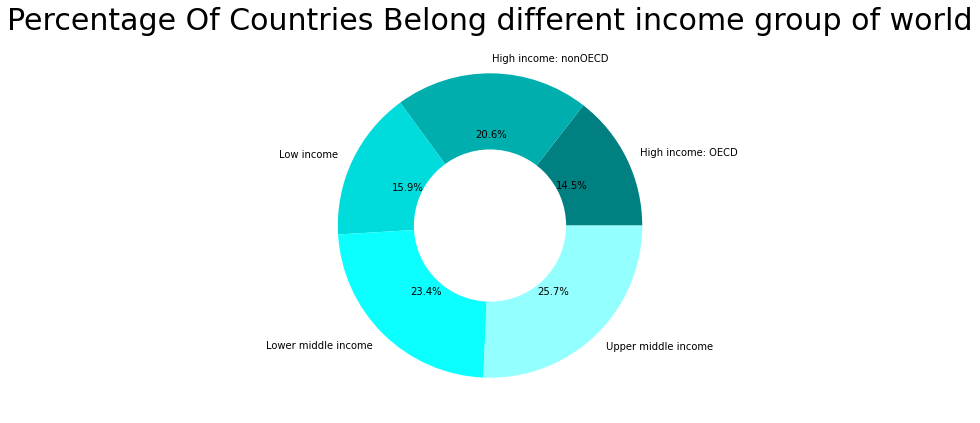

In [ ]:
Income = ['High income: OECD','High income: nonOECD','Low income','Lower middle income','Upper middle income']
data = [31,44,34,50,55]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Income,autopct='%0.1f%%',radius=1, colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF','#94FFFF'])
plt.pie([100],colors=['w'],radius=0.5)

plt.title('Percentage Of Countries Belong different income group of world',color='Black', fontsize = 30)
 
# show plot
plt.show()

In [ ]:
path = '/content/drive/MyDrive/projects..../EdStatsCountry.csv'
df_country = pd.read_csv(path)

allocation = []
for i in df_country['Income Group']:
  if i == "High income: nonOECD" or i == "High income: OECD":
    allocation.append(4)
  elif i == 'Upper middle income':
    allocation.append(3)
  elif i == 'Lower middle income':
    allocation.append(2)
  elif i == 'Low income':
    allocation.append(1)
  else:
    allocation.append(0)
df_country["allocation"] = allocation

fig = go.Figure(data=go.Choropleth(
    locations = df_country['Country Code'],
    z = df_country["allocation"],
    text = df_country['Short Name'],
    colorscale = 'teal',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Economy<br>Class ',
))
fig.update_layout(
    title_text='World Economy Class',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = 'Low Income = 1, Lower Middle Income = 2, Upper Middle Income = 3, High income = 4 ',
        showarrow = False
    )]
)

fig.show()

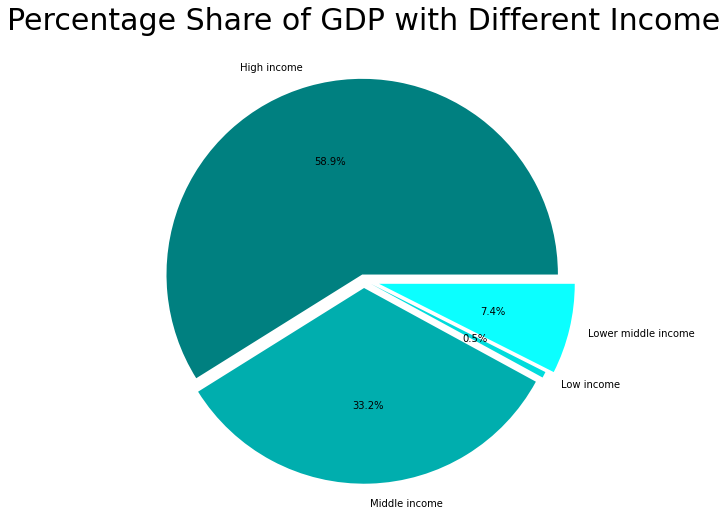

In [ ]:
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_Share.loc[['High income', 'Middle income', 'Low income', 'Lower middle income',],['2015']]
name = ['High income', 'Middle income', 'Low income', 'Lower middle income',]
quantity=[4.757751e+13,2.679605e+13,4.023901e+11,6.017050e+12]
fig = plt.figure(figsize =(12,9))
plt.pie(quantity,labels=name,autopct='%0.1f%%', explode = [0.03,0.04,0.04,0.08],colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF'])
plt.title('Percentage Share of GDP with Different Income', fontsize = 30)
plt.show()

###*Education EDA*

---



---



---



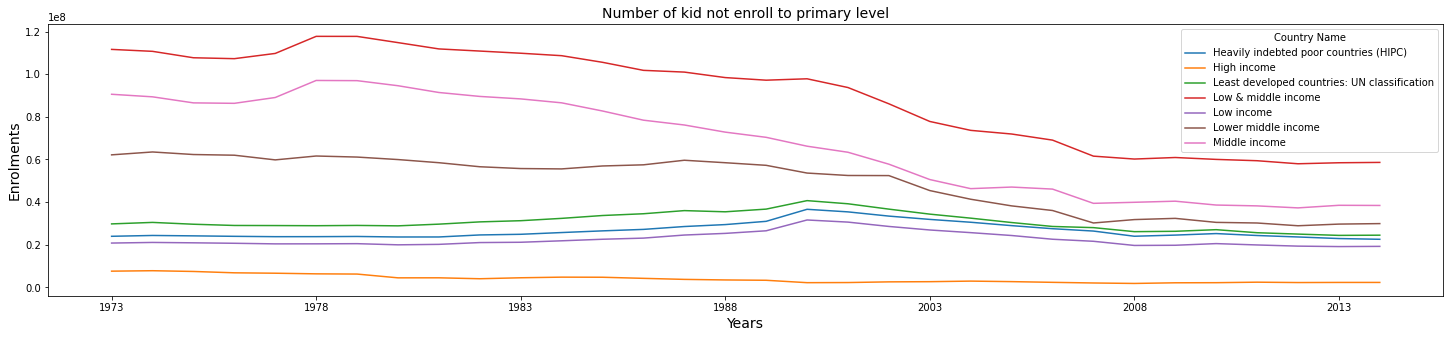

In [ ]:
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.UNER']
graph_4a=no_primary_enrollment.transpose()
graph_4a.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4a.dropna(inplace=True)

plt.rcParams['figure.figsize']=(25,5)
graph_4a.plot()
plt.title('Number of kid not enroll to primary level',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolments',fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



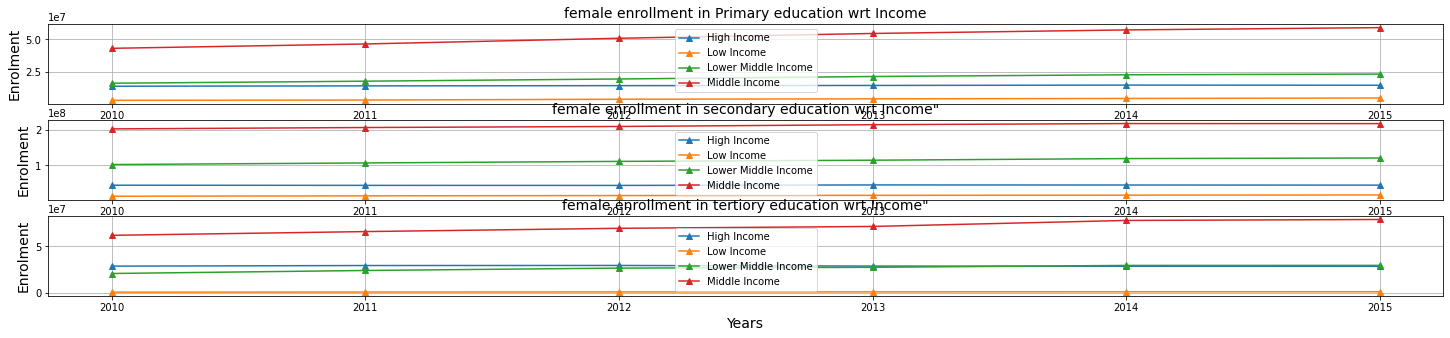

In [ ]:
# first last five years i.e. 2010-2015  - columns.
# for girls enr0llment primary, secondary, and tartiary - indicator code.
# for girls transtition data  p-s and s-t  - indicator code.
# region-wise, income-wise. region name, income-wise

girl_eduction_income=Income_df.copy()
girl_education_income_notnull=girl_eduction_income.loc[:,['Indicator Code','2010','2011','2012','2013','2014','2015']].dropna()
girl_education_income_primary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.PRE.ENRL.FE']
girl_education_income_primary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2a=girl_education_income_primary.transpose()

# for secondry
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.SEC.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2b=girl_education_income_secondry.transpose()

# for tertiary
girl_education_income_tertiary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.TER.ENRL.FE']
girl_education_income_tertiary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2c=girl_education_income_tertiary.transpose()

# Subplotting the chart of all three female enrollment wrt income.

plt.subplot(3,1,1)
plt.plot(graph_2a, marker = "^")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in Primary education wrt Income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(graph_2b, marker = "^")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in secondary education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(graph_2c,marker = "^")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in tertiory education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.show()          



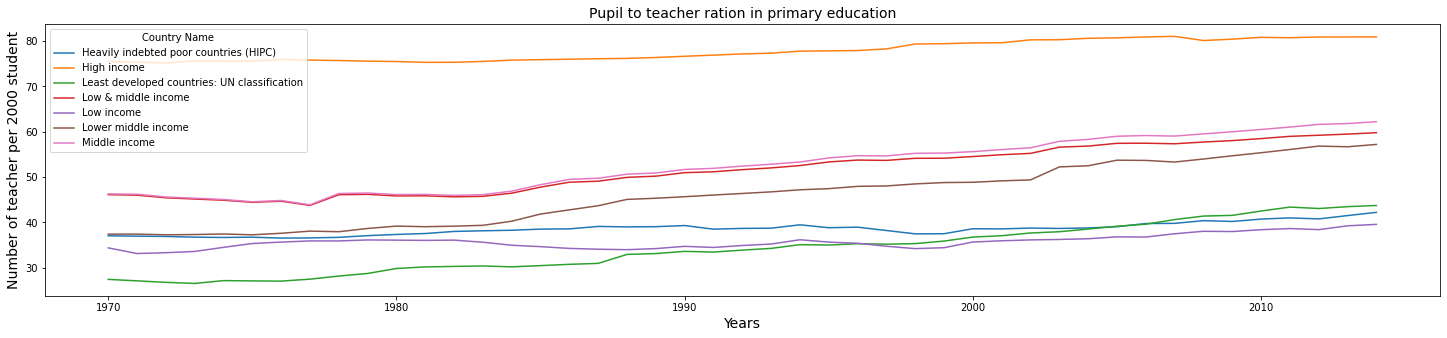

In [ ]:
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']
graph_4b=no_primary_enrollment.transpose()
graph_4b.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4b.dropna(inplace=True)
plt.rcParams['figure.figsize']=(25,5)
graph_4b.plot()
plt.title('Pupil to teacher ration in primary education',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of teacher per 2000 student',fontsize=14)
plt.show()

In [ ]:
exp1_1=pd.read_csv(path3)
exp1_1.set_index('Indicator Code',inplace=True)
exp2_1=exp1_1.loc[['SE.XPD.TOTL.GD.ZS'],['Country Name','Country Code','1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010']]
exp2_1.set_index('Country Name',inplace=True)
exp3_1=exp2_1.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
exp3_1.drop('Country Code',axis=1,inplace=True)
exp4_1=exp3_1.transpose()

exp4_1 # Final Data Frame

#Heat map 
cm = sns.light_palette("Blue", as_cmap=True)
exp4_1.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Finland,France,"Gambia, The",Hungary,Iceland,"Iran, Islamic Rep.",Ireland,Israel,Italy,Kyrgyz Republic,"Macao SAR, China",Mauritius,Mexico,Moldova,Nepal,Netherlands,Norway,Peru,Poland,Portugal,Qatar,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51,2.24,6.14,4.21,2.62,4.43,4.09,6.76,4.72,3.69,7.94,5.87,5.64,1.57,4.58,6.47,4.22,4.14,6.42,4.53,4.09,3.69,3.94,3.66,4.66,2.89,4.56,6.94,3.44,4.60,5.03,4.35,4.11,5.87,4.27,6.92,4.90,2.08,4.83,4.19,6.27,4.06
2000,4.58,2.78,5.60,3.85,2.89,3.50,3.70,7.70,4.89,3.67,8.07,5.73,5.50,1.47,4.88,6.50,4.03,4.15,6.11,4.30,3.51,3.68,3.82,4.14,4.49,2.98,4.63,6.46,3.22,4.99,5.18,3.73,3.87,5.44,4.18,6.82,4.79,2.33,5.25,4.51,6.20,4.11
2001,4.83,2.46,5.59,3.50,3.24,3.71,3.67,8.36,5.03,3.76,8.22,5.87,5.43,1.16,4.93,6.79,4.07,4.09,6.38,4.66,3.85,2.73,3.18,4.43,4.85,3.71,4.75,6.85,3.03,5.33,5.33,3.20,3.94,5.16,4.12,6.68,4.96,2.38,4.81,4.19,6.20,4.18
2002,4.01,2.14,5.54,3.15,2.95,4.27,4.09,9.57,5.49,3.99,8.21,6.04,5.42,1.44,5.19,7.42,4.49,4.10,6.46,4.43,4.45,2.86,3.12,4.64,5.50,3.15,4.87,7.44,2.82,5.40,5.24,3.85,4.25,5.05,4.14,7.00,5.32,2.78,3.86,4.01,5.79,4.72
2003,3.53,2.15,5.38,3.29,3.12,4.33,3.97,9.94,6.66,4.15,8.10,6.16,5.71,1.36,5.80,7.33,4.38,4.19,6.36,4.56,4.48,2.80,4.48,5.18,5.42,3.12,5.10,7.42,2.94,5.33,5.28,3.37,4.22,4.85,4.17,6.85,5.54,2.42,3.72,4.19,6.82,4.89
2004,3.49,2.48,5.31,3.45,3.51,4.08,4.13,10.27,6.08,4.02,8.19,6.19,5.64,1.03,5.36,7.22,4.29,4.49,5.95,4.39,4.62,2.25,4.46,4.80,6.77,3.17,5.11,7.31,2.96,5.36,5.05,3.46,4.11,5.05,4.15,6.71,5.46,2.77,4.03,3.63,6.72,4.81
2005,3.84,2.72,5.27,2.97,3.64,4.00,4.11,10.56,6.20,3.90,8.07,6.05,5.51,1.14,5.34,7.42,4.20,4.53,5.75,4.25,4.87,2.29,4.19,4.91,7.16,3.36,5.16,6.87,2.84,5.43,5.06,3.96,3.77,5.05,4.13,6.55,5.22,3.51,3.94,3.39,6.45,5.02
2006,4.11,2.71,5.26,2.56,3.50,3.89,4.00,9.06,6.23,4.22,7.74,5.92,5.45,1.21,5.32,7.35,4.42,4.55,5.75,4.53,5.54,2.21,3.83,4.76,7.50,3.61,5.09,6.37,2.66,5.20,4.92,2.71,3.71,5.07,4.16,6.41,4.98,3.40,4.05,3.67,6.44,5.04
2007,4.44,3.02,5.18,2.55,3.23,4.06,4.26,11.87,6.25,3.88,7.61,5.67,5.43,1.31,5.16,7.08,4.74,4.72,5.48,4.12,6.46,2.06,3.18,4.73,8.29,3.52,4.94,6.53,2.63,4.86,4.94,2.45,3.53,4.97,4.24,6.21,4.71,3.41,3.60,3.70,6.47,4.97
2008,4.84,3.17,5.30,2.44,3.80,3.91,4.36,14.06,6.72,3.75,7.48,5.84,5.43,3.53,5.00,7.26,4.06,5.44,5.52,4.41,5.91,2.20,3.07,4.84,8.24,3.80,5.09,6.28,2.87,5.03,4.70,4.23,3.53,4.86,4.49,6.39,4.90,3.46,3.51,3.43,6.27,4.96


               GDP percapita  total unemployment  total illiterate workforce
World               9516.347            6.081802                3.181296e+09
China               4560.513            4.200000                7.799515e+08
India               1345.770            3.600000                4.706091e+08
United States      48373.880        48373.880000                1.570211e+08
Germany            41785.560            7.000000                4.201639e+07
Euro area          37617.720           10.130160                1.614402e+08
                            GDP percapita  total unemployment  \
GDP percapita                    1.000000            0.572886   
total unemployment               0.572886            1.000000   
total illiterate workforce      -0.513668           -0.262447   

                            total illiterate workforce  
GDP percapita                                -0.513668  
total unemployment                           -0.262447  
total illiterate workforce   

Text(0.5, 1.0, 'Correlation of GDP,Illetrate work force and total unemployment')

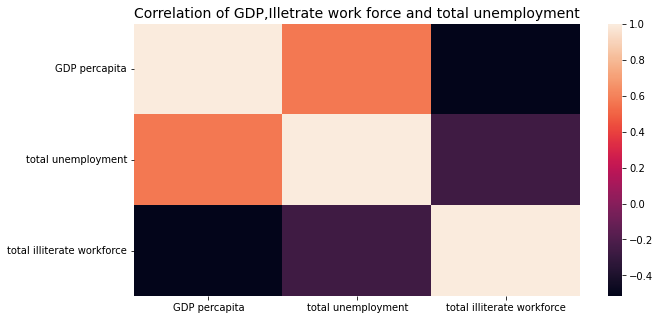

In [ ]:
nn=pd.read_csv(path3)# World,China,India,United States,Germany,Euro area
nn.set_index('Indicator Code',inplace=True)
nn2=nn.loc[['SE.ADT.1524.LT.ZS','NY.GDP.PCAP.CD','SL.UEM.TOTL.ZS','SL.TLF.TOTL.IN'],['Country Name','2010']]
World={'GDP percapita':[9.516347e+03,4.560513e+03,1.345770e+03,4.837388e+04,4.178556e+04,3.761772e+04],'total unemployment':[6.081802e+00,4.200000e+00,3.600000e+00,4.837388e+04,7.000000e+00,1.013016e+01],'total illiterate workforce':[3.181296e+09,7.799515e+08,4.706091e+08,1.570211e+08,4.201639e+07,1.614402e+08]}
# Correlation DF
cor=pd.DataFrame(World,index=['World','China','India','United States','Germany','Euro area'])
print(cor) # this is Df
#Making correlation
final_cor=cor.corr()
print(final_cor) # this is correlated df
#making Correleation map
plt.figure(figsize=(10,5))
sns.heatmap(final_cor)
plt.title('Correlation of GDP,Illetrate work force and total unemployment',fontsize=14)


###***Population growth across different income group with time***

---



---



---



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



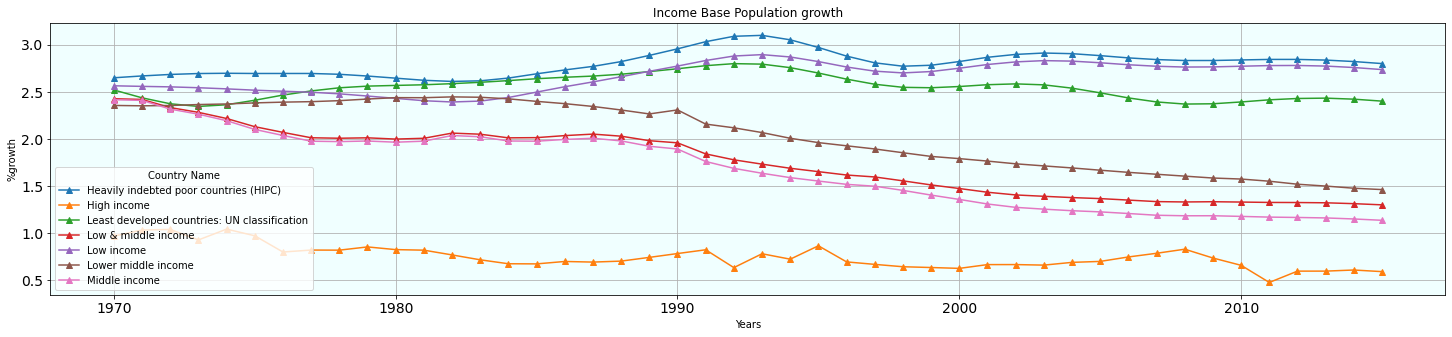

In [ ]:
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
graph_1=population_growth.transpose()

plt.rcParams['figure.figsize']=(25,5)
graph_1.plot( kind="line",xlabel = "Years" , ylabel = "%growth",
               title="Income Base Population growth",   
               fontsize = 14,figsize=(25,5),
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

###***Case study for big Economies for Expenditure on Education and their learning outcomes based on data by PISA***

---



---




---



---





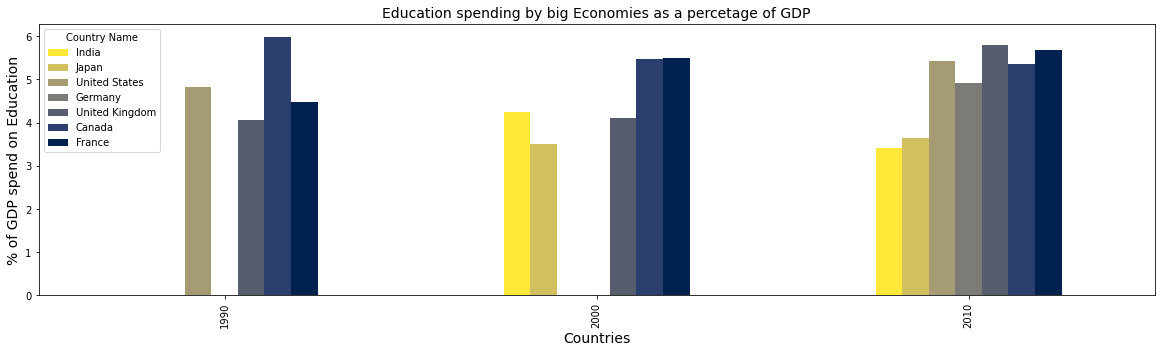

In [ ]:
clean_data1=new_data[['Country Name','Indicator Code','1990','2000','2010']]
Sorted1_1=clean_data1[clean_data1['Indicator Code']=='SE.XPD.TOTL.GD.ZS'].set_index(['Country Name'])
Sorted2_1=Sorted1_1.copy()
Sorted2_1.drop("Indicator Code",axis=1,inplace=True)
Graphk=Sorted2_1.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Graphk2=Graphk.transpose()
plt.rcParams['figure.figsize']=(20,5)
Graphk2.plot(kind='bar',colormap="cividis_r")
plt.title('Education spending by big Economies as a percetage of GDP',fontsize=14)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('% of GDP spend on Education',fontsize=14)
plt.show()

Effect of spending on labour force

Country Name        India       Japan  United States     Germany  \
1990          327611171.0  63873046.0    127940053.0  38880161.0   
2000          405518817.0  67670439.0    146767633.0  40252431.0   
2010          470609097.0  66665009.0    157021140.0  42016390.0   

Country Name  United Kingdom      Canada      France  
1990              29039812.0  14716537.0  26127625.0  
2000              29295735.0  16235329.0  27479571.0  
2010              32010605.0  18913406.0  29861080.0  


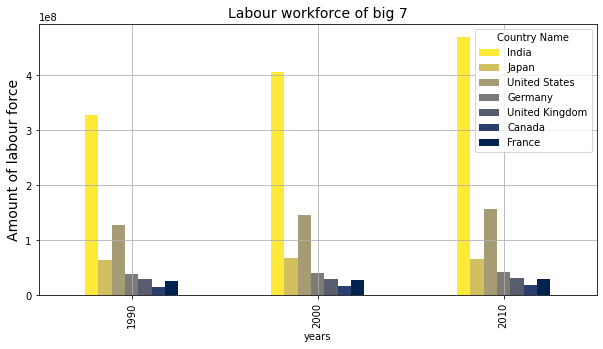

In [ ]:
# Amount of labour force
clean_data1_1=new_data[['Country Name','Indicator Code','1990','2000','2010']]
Sorted1_2=clean_data1_1[clean_data1_1['Indicator Code']=='SL.TLF.TOTL.IN'].set_index(['Country Name'])
Sorted2=Sorted1_2.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Sorted2.drop(['Indicator Code'],axis=1,inplace=True)
Sorted3=Sorted2.transpose()
print(Sorted3)
plt.rcParams['figure.figsize']=(10,5)
Sorted3.plot(kind='bar',colormap= "cividis_r")
plt.grid(True,linewidth=.8)
plt.title('Labour workforce of big 7',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Amount of labour force',fontsize=14)
plt.show()

                    2015
Country Name            
India                NaN
Japan           515.9585
United States   496.9351
Germany         509.1041
United Kingdom  497.9719
Canada          526.6678
France          499.3061


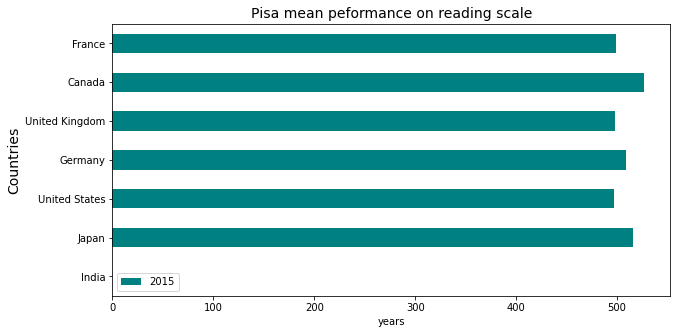

In [ ]:
# learnning outcome mean peformance on reading scale
Pisa1=new_data[['Country Name','Indicator Code','2015']]
Pisa2=Pisa1[Pisa1['Indicator Code']=='LO.PISA.REA'].set_index(['Country Name'])
Pisa3=Pisa2.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Pisa3.drop(['Indicator Code'],axis=1,inplace=True)
print(Pisa3)
plt.rcParams['figure.figsize']=(10,5)
Pisa3.plot(kind='barh',color= "Teal")
plt.title('Pisa mean peformance on reading scale',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Countries',fontsize=14)
plt.show()



                    2015
Country Name            
India                NaN
Japan           532.4399
United States   469.6285
Germany         505.9713
United Kingdom  492.4785
Canada          515.6474
France          492.9204


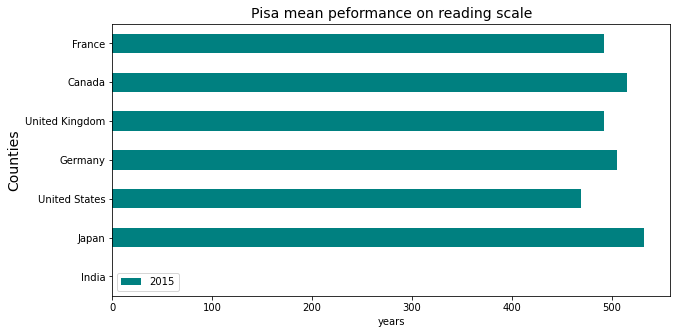

In [ ]:
# learnning outcome mean peformance on mathematic scale
Pisa1M=new_data[['Country Name','Indicator Code','2015']]
Pisa2M=Pisa1M[Pisa1M['Indicator Code']=='LO.PISA.MAT'].set_index(['Country Name'])
Pisa3M=Pisa2M.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Pisa3M.drop(['Indicator Code'],axis=1,inplace=True)
print(Pisa3M)
plt.rcParams['figure.figsize']=(10,5)
Pisa3M.plot(kind='barh',color= "Teal")
plt.title('Pisa mean peformance on reading scale',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Counties',fontsize=14)
plt.show()